In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import zipfile

# Specify the path to the zip file
zip_path = '/content/drive/MyDrive/Frame.zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/extract_frames")


In [5]:
path='/content/extract_frames/Frame'

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
# Step 1: Load images from the specified directory
imglist = []
for img in os.listdir(path):
    if img.endswith('.png'):
        p = os.path.join(path, img)
        x = cv2.imread(p)
        imglist.append(x)


In [8]:
# Step 2: Convert images to grayscale
grayimg = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imglist]
grayimg[0]

array([[250, 250, 250, ..., 193, 193, 193],
       [250, 250, 250, ..., 193, 193, 193],
       [250, 250, 250, ..., 193, 193, 192],
       ...,
       [ 43,  43,  43, ...,  37,  36,  36],
       [ 43,  43,  43, ...,  36,  35,  35],
       [ 43,  43,  43, ...,  36,  35,  35]], dtype=uint8)

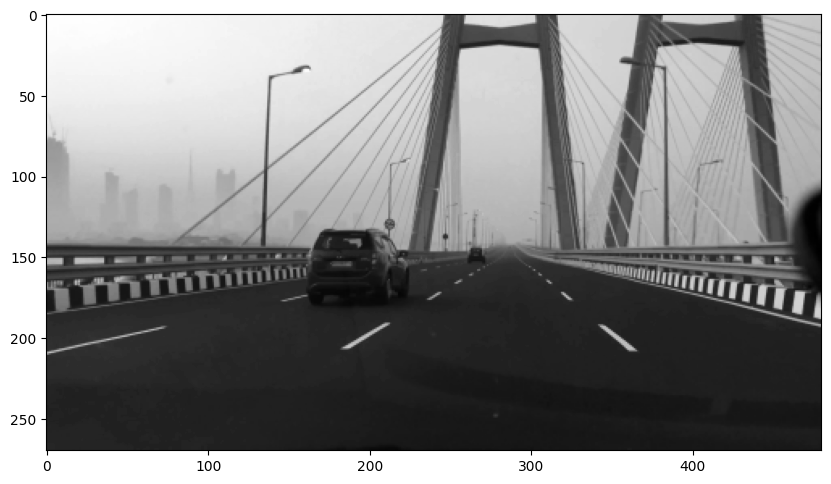

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(grayimg[1], cmap='gray');

In [10]:
# Step 3: Apply Gaussian blur to reduce noise
blur = [cv2.GaussianBlur(img, (5, 5), 0) for img in grayimg]


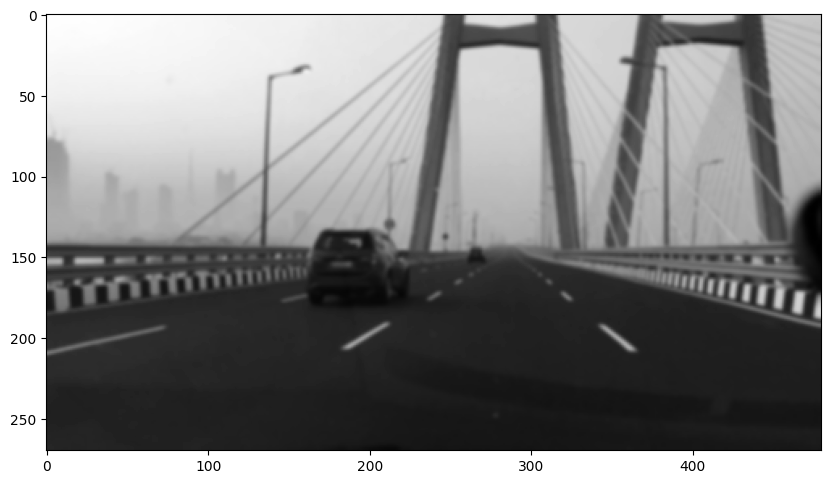

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(blur[1], cmap='gray')

In [12]:
# Step 4: Define region of interest (ROI) vertices
roivertices = np.array([[50, 270], [220, 160], [350, 160], [480, 270]], dtype=np.int32)

In [13]:
# Step 5: Create a mask to focus on the ROI
blackarray = np.zeros_like(blur[1])
cv2.fillPoly(blackarray, [roivertices], (255, 255, 255))
masked_images = [cv2.bitwise_and(img, blackarray) for img in blur]


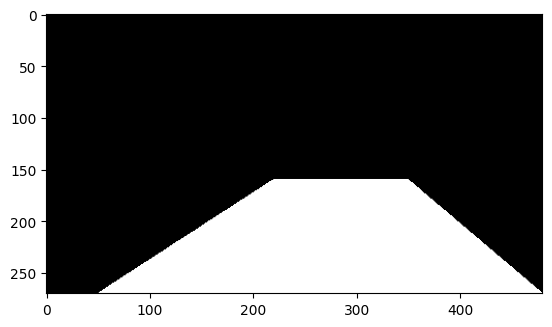

In [14]:
plt.imshow(blackarray, cmap='gray')

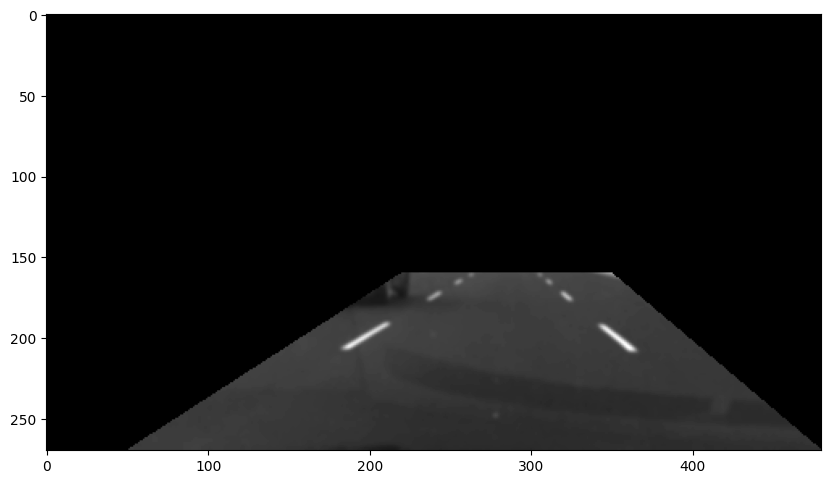

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(masked_images[1], cmap='gray')

In [16]:
#Step6: Thresholding for white lines
_,masked_thresh = cv2.threshold(np.array(masked_images),80,255,cv2.THRESH_BINARY)
masked_thresh=masked_thresh.astype(np.uint8)

In [17]:
# Step 7: Apply Canny edge detection
canny = [cv2.Canny(img, 50, 150) for img in masked_thresh]

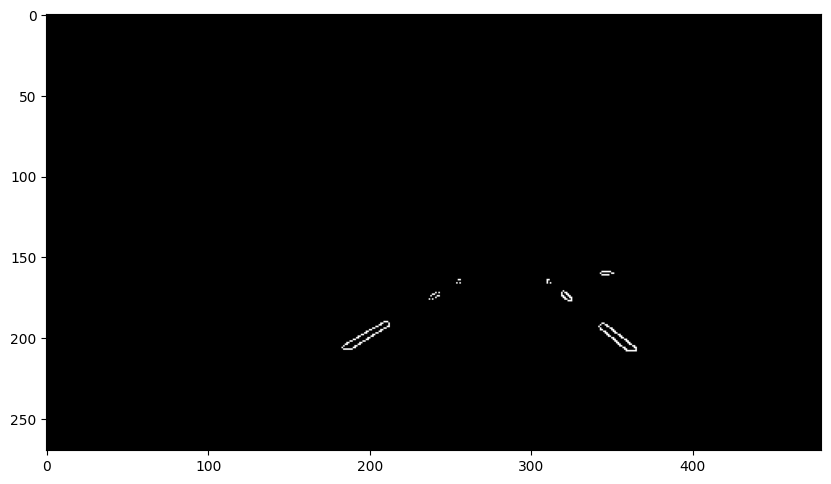

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(canny[1], cmap='gray')

In [19]:
# Step 8: Perform Hough line detection to detect lanes
result = [cv2.HoughLinesP(img, 1, np.pi/180, 25, minLineLength=10, maxLineGap=250) for img in canny]
result[1][0]

array([[311, 164, 365, 206]], dtype=int32)

In [20]:
# Step 9: Draw detected lanes on the original image if lines are detected
final = []
for img, lines in zip(imglist, result):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    final.append(img)

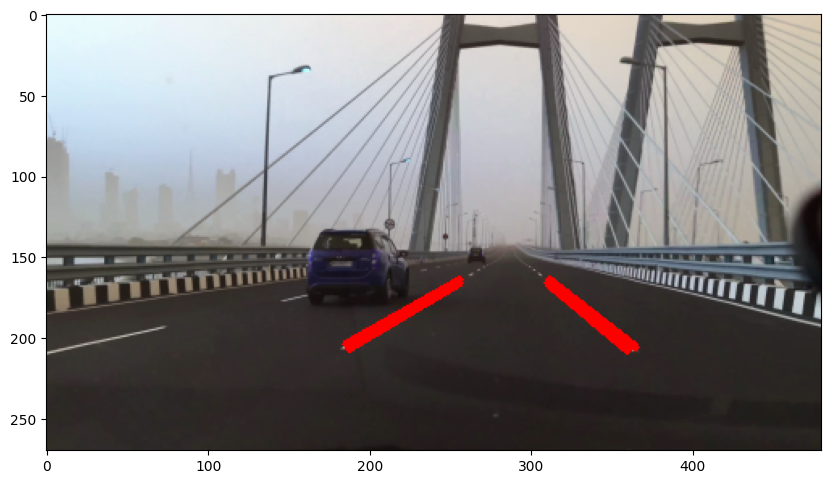

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(final[1], cmap='gray')

In [22]:
#Step 10: Recreating output on the input video
filename="/content/outvideo/out.avi"
imgx,imgy,imgc = final[0].shape
framesize=(imgy,imgx)
video= cv2.VideoWriter(filename,cv2.VideoWriter_fourcc(*'DIVX'),30,framesize)

In [23]:
for frame in final:
  video.write(frame)